In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
import os
import pathlib
from PIL import Image 
from sklearn.model_selection import train_test_split
%matplotlib inline

from matplotlib import cm
import seaborn as sns

from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D 
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Sequential
from tensorflow.keras import callbacks

from tensorflow.keras.applications.vgg16 import VGG16


from sklearn import metrics # Pour évaluer les modèles

import itertools # Pour créer des iterateurs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Détection de présence de maladie





# 1- Entrainer le modèle sur le dataset réduit de 18K images

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/PlantSpy_Dataset_18K/PlantSpy_Dataset_18K.csv', index_col=0)

In [ ]:
data.head()

,imgPath,imgName,newImgName,categorie,cat_maladie,healthy
0,/content/drive/MyDrive/Kaggle/new-plant-diseas...,ac61c972-546d-4977-ac4a-085f98bbf206___FREC_Sc...,Apple_scab_ac61c972-546d-4977-ac4a-085f98bbf20...,Apple,Apple_scab,0
1,/content/drive/MyDrive/Kaggle/new-plant-diseas...,7e32ce27-bc89-4fca-9f49-c50de91210d1___FREC_C....,Cedar_apple_rust_7e32ce27-bc89-4fca-9f49-c50de...,Apple,Cedar_apple_rust,0
2,/content/drive/MyDrive/Kaggle/new-plant-diseas...,8cf66a75-d71b-4808-a251-c929ecfa80bc___RS_HL 7...,Apple_8cf66a75-d71b-4808-a251-c929ecfa80bc___R...,Apple,healthy,1
3,/content/drive/MyDrive/Kaggle/new-plant-diseas...,b1efda88-84a3-4d96-b3bf-48d7e12155e9___FREC_Sc...,Apple_scab_b1efda88-84a3-4d96-b3bf-48d7e12155e...,Apple,Apple_scab,0
4,/content/drive/MyDrive/Kaggle/new-plant-diseas...,a572ba2c-a691-4133-bb2f-e6e97edb749c___JR_FrgE...,Black_rot_a572ba2c-a691-4133-bb2f-e6e97edb749c...,Apple,Black_rot,0


In [ ]:
data.shape

(18004, 7)

In [ ]:
img_path = pathlib.Path('/content/drive/MyDrive/PlantSpy_Dataset_18K/')

X_img=[]

for i in range(data.shape[0]):
  imgPath = str(img_path) + '/' + data['newImgName'].iloc[i]
  #print(imgPath)
  img =cv2.imread(str(imgPath), cv2.IMREAD_COLOR )
  #print(img.shape)
  img_resized = cv2.resize(img, (100,100)) 
  X_img.append(np.array(img_resized))


In [ ]:
X_img = np.array(X_img)
X_img = X_img.astype('float32')


In [ ]:
X_img.shape

(18004, 100, 100, 3)

In [ ]:
#X_img : in previous cell

In [ ]:
target2 = data['healthy']

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_img, target2, random_state = 1234, test_size=0.25)


In [ ]:
X_train_2 = X_train_2 / 255
X_test_2 = X_test_2 / 255

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y_train_2 = encoder.fit_transform(y_train_2)
y_test_2 = encoder.transform(y_test_2)

In [ ]:
y_train_2.shape

(13503,)

In [ ]:
train_data_generator_2 = ImageDataGenerator(
        rotation_range=50,
        width_shift_range=1,
        height_shift_range=1,
        zoom_range=[0.7, 1.2],
        horizontal_flip=True)

test_data_generator_2 = ImageDataGenerator()

In [ ]:
batch_size = 100

training_data_2 = train_data_generator_2.flow(X_train_2, y_train_2, batch_size=batch_size)
test_data_2 = test_data_generator_2.flow(X_test_2, y_test_2, batch_size=batch_size)


In [ ]:
input_shape = (100,100,3)

model_LeNet1_2 = Sequential()
model_LeNet1_2.add(Conv2D(filters=30, kernel_size=(5, 5), padding='valid', input_shape=input_shape, activation='relu'))
model_LeNet1_2.add(MaxPooling2D(pool_size=(3, 3)))
model_LeNet1_2.add(Dropout(rate=0.2))
model_LeNet1_2.add(Conv2D(filters=64, kernel_size=(3, 3), padding='valid', activation='relu'))
model_LeNet1_2.add(MaxPooling2D(pool_size=(2, 2)))
model_LeNet1_2.add(Conv2D(filters=32, kernel_size=(3, 3), padding='valid', activation='relu'))
model_LeNet1_2.add(MaxPooling2D(pool_size=(2, 2)))
model_LeNet1_2.add(Dropout(rate=0.2))
model_LeNet1_2.add(Flatten())
model_LeNet1_2.add(Dense(units=64, activation='relu'))
model_LeNet1_2.add(Dense(units=1, activation='sigmoid')) #14 ? # softmax vs sigmoid DL 


In [ ]:
model_LeNet1_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model_LeNet1_2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 96, 96, 30)        2280      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 30)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 30)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 64)        17344     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 32)       

In [ ]:
apply_LeNet1_2 = model_LeNet1_2.fit_generator(generator = training_data_2, 
                              epochs = 30, # passser de 15 à 50
                              steps_per_epoch = len(X_train_2)//batch_size,
                              validation_data = test_data_2,
                              validation_steps = len(X_test_2)//batch_size,
                              callbacks = [early_stopping,lr_plateau])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
135/135 [==============================] - 203s 1s/step - loss: 0.5497 - accuracy: 0.6993 - val_loss: 0.4949 - val_accuracy: 0.7491 - lr: 0.0010
Epoch 2/30
135/135 [==============================] - 193s 1s/step - loss: 0.4247 - accuracy: 0.7910 - val_loss: 0.3271 - val_accuracy: 0.8698 - lr: 0.0010
Epoch 3/30
135/135 [==============================] - 196s 1s/step - loss: 0.2945 - accuracy: 0.8793 - val_loss: 0.2497 - val_accuracy: 0.8878 - lr: 0.0010
Epoch 4/30
135/135 [==============================] - 192s 1s/step - loss: 0.2443 - accuracy: 0.9000 - val_loss: 0.1918 - val_accuracy: 0.9204 - lr: 0.0010
Epoch 5/30
135/135 [==============================] - 194s 1s/step - loss: 0.2005 - accuracy: 0.9192 - val_loss: 0.1691 - val_accuracy: 0.9347 - lr: 0.0010
Epoch 6/30
135/135 [==============================] - 196s 1s/step - loss: 0.1945 - accuracy: 0.9232 - val_loss: 0.1594 - val_accuracy: 0.9391 - lr: 0.0010
Epoch 7/30
135/135 [==============================] - 193s 1s/st

In [ ]:
X_img_Lenet_Gen_PRED_Healthy = model_LeNet1_2.predict(X_img_Lenet_Gen)


In [ ]:
model_LeNet1_2.save('/content/drive/MyDrive/model_isHealthy_18K')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/model_isHealthy_18K/assets


In [ ]:
dd =pd.DataFrame(X_img_Lenet_Gen_PRED_Healthy, columns = ['healthy_pred'])
dd_n = np.where(dd['healthy_pred'] >= 0.5, 1, 0)

In [ ]:
data['healthy_predicted'] = pd.DataFrame(dd_n)
data.head(3)

,imgPath,imgName,newImgName,categorie,cat_maladie,healthy,healthy_predicted
0,/content/drive/MyDrive/Kaggle/new-plant-diseas...,ac61c972-546d-4977-ac4a-085f98bbf206___FREC_Sc...,Apple_scab_ac61c972-546d-4977-ac4a-085f98bbf20...,Apple,Apple_scab,0,1
1,/content/drive/MyDrive/Kaggle/new-plant-diseas...,7e32ce27-bc89-4fca-9f49-c50de91210d1___FREC_C....,Cedar_apple_rust_7e32ce27-bc89-4fca-9f49-c50de...,Apple,Cedar_apple_rust,0,0
2,/content/drive/MyDrive/Kaggle/new-plant-diseas...,8cf66a75-d71b-4808-a251-c929ecfa80bc___RS_HL 7...,Apple_8cf66a75-d71b-4808-a251-c929ecfa80bc___R...,Apple,healthy,1,1


In [ ]:
data.to_csv('/content/drive/MyDrive/PlantSpy_Dataset_18K/PlantSpy_Dataset_18K_Categorie_Healthy_Predictions.csv')

In [ ]:
print(metrics.classification_report(data['healthy'], dd_n))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     10079
           1       0.91      1.00      0.95      7925

    accuracy                           0.95     18004
   macro avg       0.95      0.96      0.95     18004
weighted avg       0.96      0.95      0.95     18004



In [ ]:
cnf_matrix = metrics.confusion_matrix(data['healthy'], dd_n, normalize = 'true')


In [ ]:
print(np.round(cnf_matrix,2))

[[0.92 0.08]
 [0.   1.  ]]


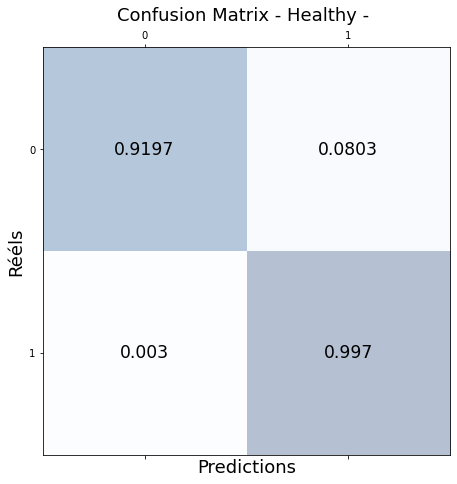

In [ ]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cnf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cnf_matrix.shape[0]):
    for j in range(cnf_matrix.shape[1]):
        ax.text(x=j, y=i,s=np.round(cnf_matrix[i, j], 4), va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Rééls', fontsize=18)
plt.title('Confusion Matrix - Healthy - ', fontsize=18)
plt.show()

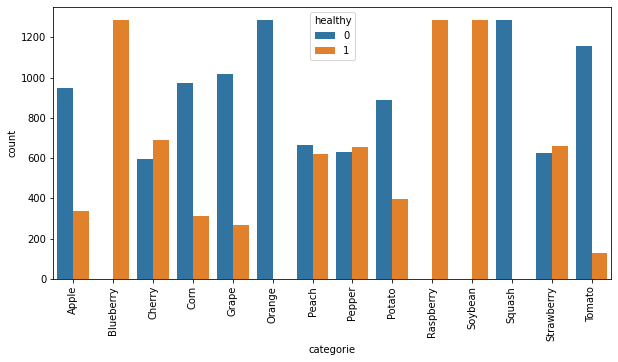

In [ ]:
plt.figure(figsize=(10, 5))

sns.countplot(x="categorie", hue="healthy", data=data)
plt.xticks(rotation=90);


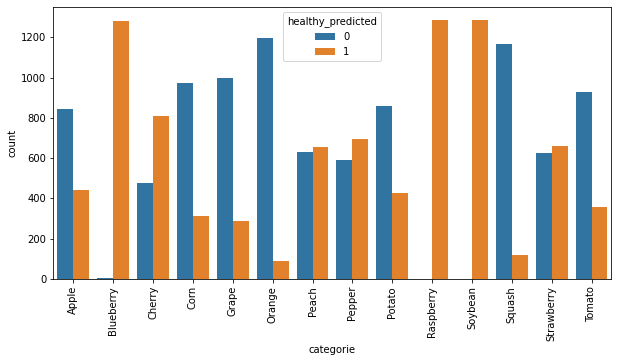

In [ ]:
plt.figure(figsize=(10, 5))

sns.countplot(x="categorie", hue="healthy_predicted", data=data)
plt.xticks(rotation=90);

# 2- Appliquer le modèle IsHealthy au dataset "Valid"


In [ ]:
model_isHealthy = tf.keras.models.load_model('/content/drive/MyDrive/model_isHealthy_18K') 

In [ ]:
folder_path = "/content/drive/MyDrive/NewPlantDiseasesDataset/valid/"

X_valid0=[]
y_valid0=[] # La categorie_maladie


width = 100
height = 100 # resize to 100x100 to solve the RAM issue in Kaggle notebooks

for path, dirs, files in os.walk(folder_path):
    for repertoire in dirs:
      chemin=folder_path+repertoire
      for images in os.listdir(chemin):
        img=cv2.imread(chemin+'/'+images,cv2.IMREAD_COLOR )
        img_resized = cv2.resize(img, (width,height)) 
        X_valid0.append(np.array(img_resized))
        
        #categorie =repertoire.split('___')[0]
        maladie = repertoire.split('___')[1]
        #categorie_maladie = categorie+'_'+maladie
        y_valid0.append(maladie)   




In [ ]:
pd.DataFrame(y_valid0).tail()

,0
17567,healthy
17568,healthy
17569,healthy
17570,healthy
17571,healthy


In [ ]:
y_valid = (pd.DataFrame(y_valid0)=="healthy")*1

In [ ]:
y_valid.value_counts()

0    12000
1     5572
dtype: int64

In [ ]:
X_valid= np.array(X_valid0)/255
X_valid = X_valid.astype('float32')


In [ ]:
test_pred_isHealthy_valid = model_isHealthy.predict(X_valid)

In [ ]:
test_pred_isHealthy_valid_ =pd.DataFrame(test_pred_isHealthy_valid, columns = ['healthy_pred'])
isHealthy_valid_pred = np.where(test_pred_isHealthy_valid_['healthy_pred'] >= 0.5, 1, 0) 

In [ ]:
pd.DataFrame(isHealthy_valid_pred).value_counts()

0    10644
1     6928
dtype: int64

In [ ]:

print(metrics.classification_report(y_valid, isHealthy_valid_pred))


              precision    recall  f1-score   support

           0       1.00      0.88      0.94     12000
           1       0.80      0.99      0.88      5572

    accuracy                           0.92     17572
   macro avg       0.90      0.94      0.91     17572
weighted avg       0.93      0.92      0.92     17572



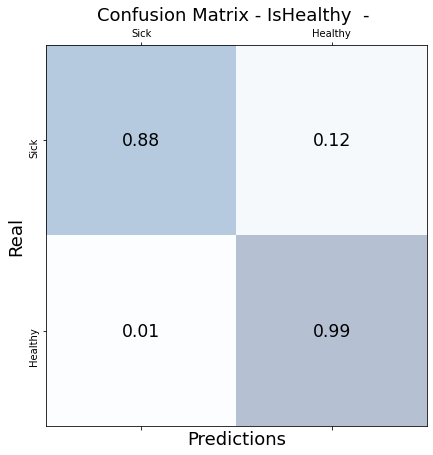

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_valid, isHealthy_valid_pred, normalize = 'true')

fig, ax = plt.subplots(figsize=(7, 7))
ax.matshow(cnf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cnf_matrix.shape[0]):
    for j in range(cnf_matrix.shape[1]):
        ax.text(x=j, y=i,s=np.round(cnf_matrix[i, j], 2), va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.xticks(range(0,2), ['Sick', 'Healthy'])

plt.ylabel('Real', fontsize=18)
plt.yticks(range(0,2), ['Sick', 'Healthy'], rotation = 90)


plt.title('Confusion Matrix - IsHealthy  - ', fontsize=18)

plt.show()